# HORÁRIO ESCOLAR UTILIZANDO ALGORITMO GENÉTICO

Aula de 1 dia apenas

x horarios por dia\
Aulas não podem ser simultâneas para um mesmo professor.\
Aulas não podem ser simultâneas para uma mesma turma.\
Cada sala deve ter apenas uma aula por vez.

Horario [3] e Turma [4] não seram alterados\
Algoritmo mudará somente matéria[0], professor[1] e sala[2]

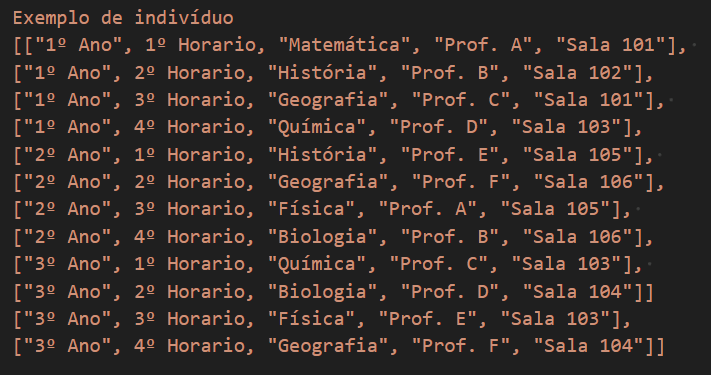.

## Cabeçalho

In [ ]:
import random
import itertools
from scipy import special as sc
import pprint

# Constantes e parâmetros do experimento
NUM_CLASSES = 3  # Número de turmas (1º Ano, 2º Ano, 3º Ano)
NUM_PERIODS = 5  # Número de horários por dia (1º Horário, 2º Horário, 3º Horário, 4º Horário)
POPULATION_SIZE = 10  # Tamanho da população de soluções
MIXING_NUMBER = 2  # Número de pais usados para cruzamento
MUTATION_RATE = 0.05  # Taxa de mutação

# Listas de disciplinas, professores e salas
subjects = ["Matemática", "História", "Geografia", "Química", "Física", "Biologia"]
teachers = ["Prof. Ana", "Prof. Bruno", "Prof. Camila", "Prof. Diego", "Prof. Elisa", "Prof. Felipe"]
rooms = ["Sala 101", "Sala 102", "Sala 103", "Sala 104"]

## Função de pontuação de aptidão - Quão boa é uma solução?

In [ ]:
# Função de pontuação de aptidão - Quão boa é uma solução?
def fitness_score(schedule):
    conflicts = 0  # Inicializa o contador de conflitos com zero

    # Loop para verificar conflitos dentro de cada turma
    for class_index in range(NUM_CLASSES):
        seen_subjects = set()  # Conjunto para armazenar disciplinas já vistas na turma atual

        # Loop para verificar cada período na turma atual
        for period in range(NUM_PERIODS):
            subject = schedule[class_index][period][0]  # Obtém a disciplina do período atual

            # Verifica se a disciplina já foi vista na turma atual
            if subject in seen_subjects:
                conflicts += 1  # Incrementa o contador de conflitos se a disciplina aparecer mais de uma vez na mesma turma
            seen_subjects.add(subject)  # Adiciona a disciplina ao conjunto de disciplinas já vistas

    # Loop para verificar conflitos entre turmas no mesmo período
    for period in range(NUM_PERIODS):
        seen_teachers = set()  # Conjunto para armazenar professores já vistos no período atual
        seen_rooms = set()  # Conjunto para armazenar salas já vistas no período atual
        seen_subjects = set()  # Conjunto para armazenar disciplinas já vistas no período atual

        # Loop para verificar cada turma no período atual
        for class_index in range(NUM_CLASSES):
            subject = schedule[class_index][period][0]  # Obtém a disciplina do período atual
            teacher = schedule[class_index][period][1]  # Obtém o professor do período atual
            room = schedule[class_index][period][2]  # Obtém a sala do período atual

            # Verifica se a disciplina já foi vista no período atual em diferentes turmas
            if subject in seen_subjects:
                conflicts += 1  # Incrementa o contador de conflitos se a disciplina estiver sendo ensinada ao mesmo tempo em diferentes turmas
            # Verifica se o professor já foi visto no período atual
            if teacher in seen_teachers:
                conflicts += 1  # Incrementa o contador de conflitos se o mesmo professor estiver dando mais de uma aula ao mesmo tempo
            # Verifica se a sala já foi vista no período atual
            if room in seen_rooms:
                conflicts += 1  # Incrementa o contador de conflitos se a mesma sala estiver sendo usada para mais de uma aula ao mesmo tempo

            seen_subjects.add(subject)  # Adiciona a disciplina ao conjunto de disciplinas já vistas
            seen_teachers.add(teacher)  # Adiciona o professor ao conjunto de professores já vistos
            seen_rooms.add(room)  # Adiciona a sala ao conjunto de salas já vistas

    return -conflicts  # Retorna o negativo do número de conflitos (queremos minimizar os conflitos)

## Função de seleção de pais com base na pontuação de aptidão

In [ ]:
# Função de seleção de pais com base na pontuação de aptidão
def selection(population):
    # Inicializa uma lista vazia para armazenar os pais selecionados
    parents = []
    
    # Encontra a menor pontuação de aptidão na população
    min_score = min(fitness_score(ind) for ind in population)
    
    # Normaliza as pontuações de aptidão para serem positivas
    normalized_scores = [(fitness_score(ind) - min_score + 1) for ind in population]
    
    # Para cada indivíduo na população e sua pontuação normalizada
    for ind, norm_score in zip(population, normalized_scores):
        # Se um número aleatório dentro da faixa de pontuações normalizadas for menor que a pontuação normalizada do indivíduo
        if random.randrange(0, max(normalized_scores)) < norm_score:
            # Adiciona o indivíduo à lista de pais selecionados
            parents.append(ind)
    
    # Retorna a lista de pais selecionados
    return parents

## Função de crossover - Combina características de cada solução usando um ponto de cruzamento

In [37]:
# Função de crossover - Combina características de cada solução usando um ponto de cruzamento
def crossover(parents):
    # Seleciona pontos de cruzamento aleatórios
    cross_points = random.sample(range(NUM_PERIODS), MIXING_NUMBER - 1)
    # Inicializa uma lista vazia para armazenar os descendentes
    offsprings = []
    # Gera todas as permutações possíveis dos pais, considerando o número de pais usados para cruzamento
    permutations = list(itertools.permutations(parents, MIXING_NUMBER))

    # Para cada permutação de pais
    for perm in permutations:
        # Inicializa um novo descendente vazio
        offspring = []
        # Ponto de início para o cruzamento
        start_pt = 0
        # Para cada índice de pai e ponto de cruzamento
        for parent_idx, cross_point in enumerate(cross_points):
            # Para cada classe (turma)
            for class_index in range(NUM_CLASSES):
                # Seleciona a parte do cronograma do pai atual até o ponto de cruzamento
                parent_part = perm[parent_idx][class_index][start_pt:cross_point]
                # Se o descendente não tem a classe atual, adiciona a parte do pai
                if len(offspring) <= class_index:
                    offspring.append(parent_part)
                else:
                    # Caso contrário, estende a classe atual com a parte do pai
                    offspring[class_index].extend(parent_part)
            # Atualiza o ponto de início para o próximo cruzamento
            start_pt = cross_point

        # Para cada classe (turma)
        for class_index in range(NUM_CLASSES):
            # Seleciona a parte final do último pai desde o ponto de cruzamento até o final
            last_parent = perm[-1][class_index]
            parent_part = last_parent[start_pt:]
            # Adiciona essa parte ao descendente
            offspring[class_index].extend(parent_part)

        # Adiciona o descendente gerado à lista de descendentes
        offsprings.append(offspring)

    # Retorna a lista de descendentes
    return offsprings

## Função de mutação - Cria diversidade na população

In [ ]:
# Função de mutação - Cria diversidade na população
def mutate(schedule):
    # Itera sobre cada turma (classe) no cronograma
    for class_index in range(NUM_CLASSES):
        # Itera sobre cada período (horário) no cronograma da turma
        for period in range(NUM_PERIODS):
            # Gera um número aleatório entre 0 e 1 e compara com a taxa de mutação
            if random.random() < MUTATION_RATE:
                time = schedule[class_index][period][3]
                year = schedule[class_index][period][4]
                # Se o número aleatório for menor que a taxa de mutação, realiza a mutação
                schedule[class_index][period] = [
                    random.choice(subjects),  # Escolhe aleatoriamente uma matéria
                    random.choice(teachers),  # Escolhe aleatoriamente um professor
                    random.choice(rooms),      # Escolhe aleatoriamente uma sala
                    time,                     # Mantém o horário atual
                    year                      # Mantém a turma atual
                ]
    # Retorna o cronograma possivelmente modificado
    return schedule


## Imprime a solução encontrada


In [ ]:
# Imprime a solução encontrada
def print_found_goal(population, to_print=True):
    # Itera sobre cada indivíduo na população
    for ind in population:
        # Calcula a pontuação de aptidão do indivíduo
        score = fitness_score(ind)
        
        # Se a impressão estiver habilitada, imprime o cronograma e a pontuação
        if to_print:
            #comente para ter somente a nota de aptidão
            print('\nHorário de aulas: ')
            #comente para ter somente a nota de aptidão
            pprint.pprint(ind)
            print(f'Nota de aptidão: {score}')
        
        # Verifica se a pontuação do indivíduo é 0 (sem conflitos)
        if score == 0:
            # Se a impressão estiver habilitada, imprime que a solução foi encontrada
            if to_print:
                print('SOLUÇÃO ENCONTRADA')
                print('Geração: ', generation, '\n')
            # Retorna True indicando que uma solução sem conflitos foi encontrada
            return True
    
    # Se a impressão estiver habilitada, imprime que a solução não foi encontrada
    if to_print:
        print('Solução não encontrada')
    # Retorna False indicando que nenhuma solução sem conflitos foi encontrada
    return False


## Função para implementar a evolução


In [ ]:
# Função para implementar a evolução
def evolution(population):
    # Seleciona os pais a partir da população atual com base na pontuação de aptidão
    parents = selection(population)
    
    # Realiza o crossover entre os pais selecionados para gerar descendentes (offsprings)
    offsprings = crossover(parents)
    
    # Aplica mutações aos descendentes
    offsprings = list(map(mutate, offsprings))

    # Combina os descendentes com a população atual
    new_gen = offsprings + population
    
    # Ordena a nova geração com base na pontuação de aptidão em ordem decrescente
    # Mantém apenas os melhores indivíduos até o tamanho máximo da população
    new_gen = sorted(new_gen, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]

    # Retorna a nova geração
    return new_gen

## Gera a população inicial

In [ ]:
# Gera a população inicial (soluções)
def generate_population():
    # Cria uma lista vazia para armazenar a população inicial
    population = []
    
    # Loop para criar um número definido de soluções (indivíduos) na população
    for _ in range(POPULATION_SIZE):
        # Cria uma nova solução (um cronograma de aulas)
        schedule = []
        
        # Loop para criar um número definido de classes (turmas) no cronograma
        for i in range(NUM_CLASSES):
            # Cria uma lista vazia para armazenar os períodos de aula para a classe atual
            class_schedule = []
            
            # Loop para criar um número definido de períodos (horários) para a classe
            for j in range(NUM_PERIODS):
                # Adiciona um período de aula à lista, escolhendo aleatoriamente um assunto, um professor e uma sala
                class_schedule.append([
                    random.choice(subjects),   # Escolhe aleatoriamente um assunto da lista 'matérias'
                    random.choice(teachers),   # Escolhe aleatoriamente um professor da lista 'professores'
                    random.choice(rooms),       # Escolhe aleatoriamente uma sala da lista 'salas'
                    str(j+1) + 'º Horário',     # Adiciona o horário atual ao período de aula
                    str(i+1) + 'º Ano'          # Adiciona a turma atual ao período de aula
                ])
            # Adiciona o cronograma da classe ao cronograma geral
            #class_schedule.append('turma '+str(i+1))
            schedule.append(class_schedule)
        
        # Adiciona a solução (cronograma de aulas) à população
        population.append(schedule)
    
    # Retorna a população gerada
    return population

## Executa o código

In [48]:
# Executa o experimento
generation = 0
population = generate_population()

# Loop até encontrar a solução
while not print_found_goal(population):
    # Imprime a geração atual
    print(f'Generation: {generation}\n\n')
    #print sem quebra de linha
    
    
    # Verifica e imprime a pontuação de aptidão da população atual
    #print_found_goal(population)
    
    # Evolui a população para a próxima geração
    population = evolution(population)
    
    # Incrementa o contador de gerações
    generation += 1



Horário de aulas: 
[[['Física', 'Prof. Bruno', 'Sala 104', '1º Horário', '1º Ano'],
  ['Geografia', 'Prof. Camila', 'Sala 102', '2º Horário', '1º Ano'],
  ['História', 'Prof. Ana', 'Sala 104', '3º Horário', '1º Ano'],
  ['Química', 'Prof. Elisa', 'Sala 102', '4º Horário', '1º Ano'],
  ['Geografia', 'Prof. Felipe', 'Sala 103', '5º Horário', '1º Ano']],
 [['História', 'Prof. Camila', 'Sala 101', '1º Horário', '2º Ano'],
  ['História', 'Prof. Elisa', 'Sala 101', '2º Horário', '2º Ano'],
  ['História', 'Prof. Felipe', 'Sala 103', '3º Horário', '2º Ano'],
  ['Matemática', 'Prof. Elisa', 'Sala 103', '4º Horário', '2º Ano'],
  ['Biologia', 'Prof. Bruno', 'Sala 104', '5º Horário', '2º Ano']],
 [['Biologia', 'Prof. Camila', 'Sala 102', '1º Horário', '3º Ano'],
  ['Química', 'Prof. Elisa', 'Sala 101', '2º Horário', '3º Ano'],
  ['Física', 'Prof. Bruno', 'Sala 102', '3º Horário', '3º Ano'],
  ['Geografia', 'Prof. Felipe', 'Sala 101', '4º Horário', '3º Ano'],
  ['Física', 'Prof. Bruno', 'Sala 104